In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('../data/mushroom_clean.csv')
data.drop('Unnamed: 0', axis = 1, inplace = True) 

In [4]:
dic = {'1' : 'bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s' , '2' : 'fibrous=f,grooves=g,scaly=y,smooth=s',
'3' : 'brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y' , '4' : 'bruises=t,no=f' , '5' : 'almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s',
'6' : 'attached=a,descending=d,free=f,notched=n' , '7' : 'close=c,crowded=w,distant=d' , '8' : 'broad=b,narrow=n',
'9' : 'black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y',
'10' : 'enlarging=e,tapering=t' , '11' : 'bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?',
'11' : 'fibrous=f,scaly=y,silky=k,smooth=s' , '12' : 'fibrous=f,scaly=y,silky=k,smooth=s' , '13' : 'brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y',
'14' : 'brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y' , '15' : 'partial=p,universal=u',
'16' : 'brown=n,orange=o,white=w,yellow=y', '17' : 'none=n,one=o,two=t', '18' : 'cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z' , 
'19' : 'black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y' , '20' : 'abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y' ,
 '21': 'grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d'  }
cl= data.columns.tolist()
ind = 0
for i in dic.values() : 
    ind = ind +  1 
    l = i.split(',') 
    for i in range(0,len(l)) : 
        le = len(l[i]) -1
        c = l[i][le] 
        last = '=' + c 
        slice = l[i].find(last)
        data[cl[ind]]  = data[cl[ind]].apply(lambda x : x.replace(c, l[i][:slice]) if  x == c else x)

### <font color='green'>Sara-EDA</font> 

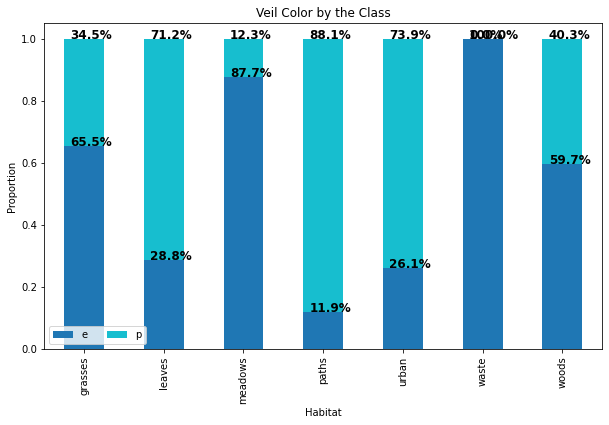

In [40]:
# Habitat vs class

cross_tab_prop = pd.crosstab(index=data['habitat'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Habitat")
plt.ylabel("Proportion")
plt.title('Veil Color by the Class')



for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

From this plot, we can conclude that if we found the mushroom in population waste then it is 100% edible. Also, there is a high chance that it is poisonous if it is found in paths.

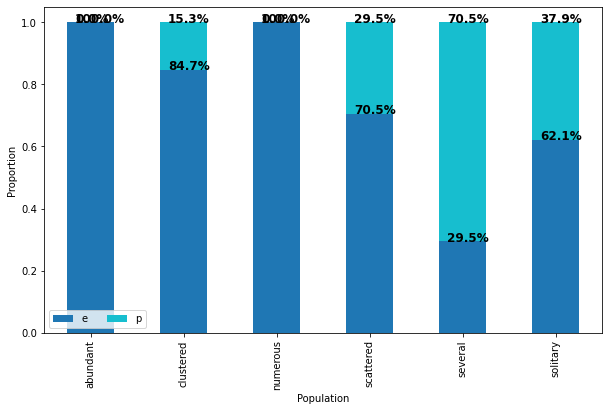

In [7]:
# Population vs class 

cross_tab_prop = pd.crosstab(index=data['population'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Population")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

if the mushroom is scattered or grouped in abundant or numerous ways then it is 100% edible.

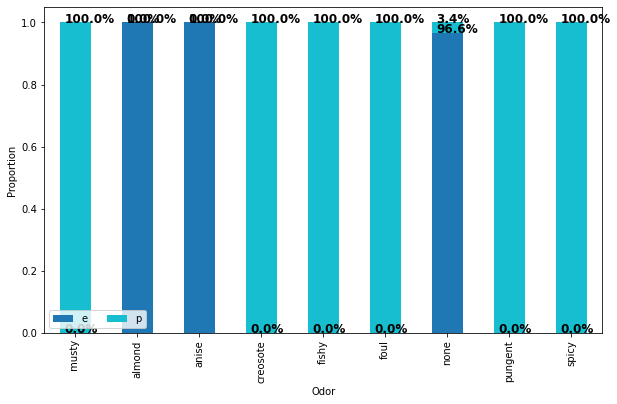

In [8]:
# Odor vs class

cross_tab_prop = pd.crosstab(index=data['odor'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Odor")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

You can almost identify if it is edible or not by the smell. Only the mushrooms that have no smell will have a slight variation with 3.4%. This can indicate that this column will have a significant effect on our classification model.

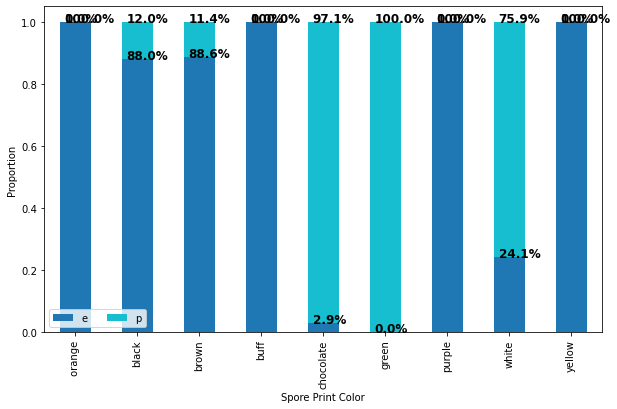

In [9]:
# Spore print color vs class

cross_tab_prop = pd.crosstab(index=data['spore_print_color'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Spore Print Color")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

The plot shows that all the colors can be used to identify the class except the white color

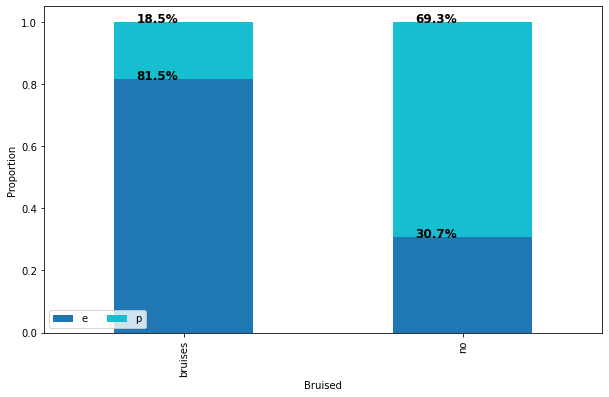

In [10]:
# Bruised vs class

cross_tab_prop = pd.crosstab(index=data['bruises'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Bruised")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show() # last bar + ticks

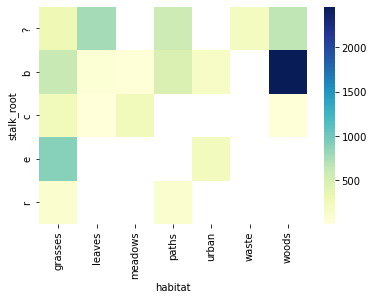

In [11]:
# Stalk root vs habitat

hm = data.groupby(['habitat','stalk_root'], as_index = False)[['class']].count()
hm = hm.pivot('stalk_root', 'habitat', 'class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

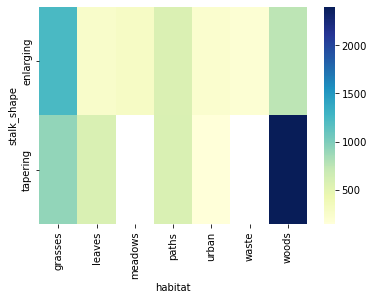

In [12]:
# Stalk shape vs habitat

hm = data.groupby(['habitat','stalk_shape'], as_index = False)[['class']].count()
hm = hm.pivot('stalk_shape','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

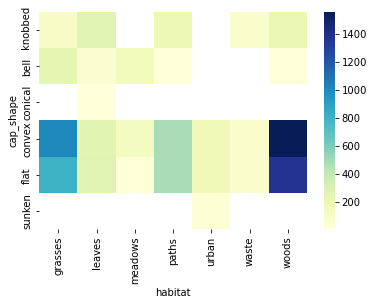

In [13]:
#Cap shape vs habitat 

hm = data.groupby(['habitat','cap_shape'], as_index = False)[['class']].count()
hm = hm.pivot('cap_shape','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

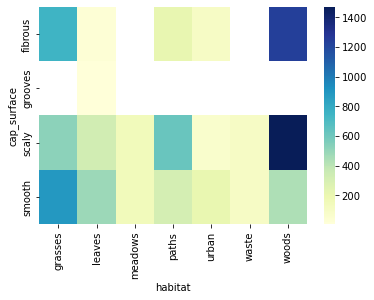

In [14]:
# Cap surface vs habitat 

hm = data.groupby(['habitat','cap_surface'], as_index = False)[['class']].count()
hm = hm.pivot('cap_surface','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

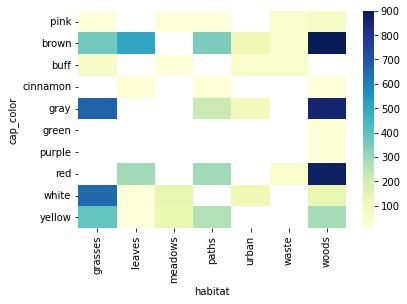

In [15]:
# Cap color vs habitat 

hm = data.groupby(['habitat','cap_color'], as_index = False)[['class']].count()
hm = hm.pivot('cap_color','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

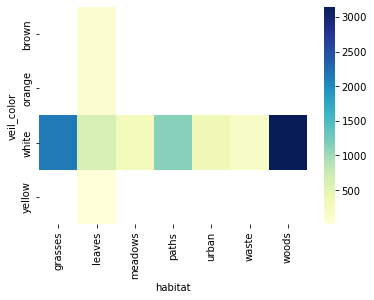

In [16]:
# Veil color vs habitat

hm = data.groupby(['habitat','veil_color'], as_index = False)[['class']].count()
hm = hm.pivot('veil_color','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

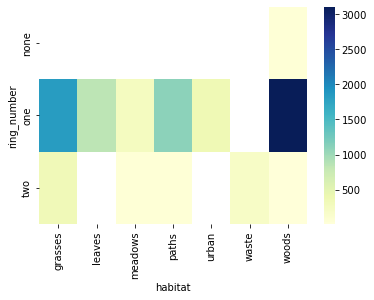

In [17]:
# Ring number vs habitat

hm = data.groupby(['habitat','ring_number'], as_index = False)[['class']].count()
hm = hm.pivot('ring_number','habitat','class')
hm.fillna(0)
ax = sns.heatmap(hm, cmap="YlGnBu")

### <font color='green'>Mohammed-EDA</font>

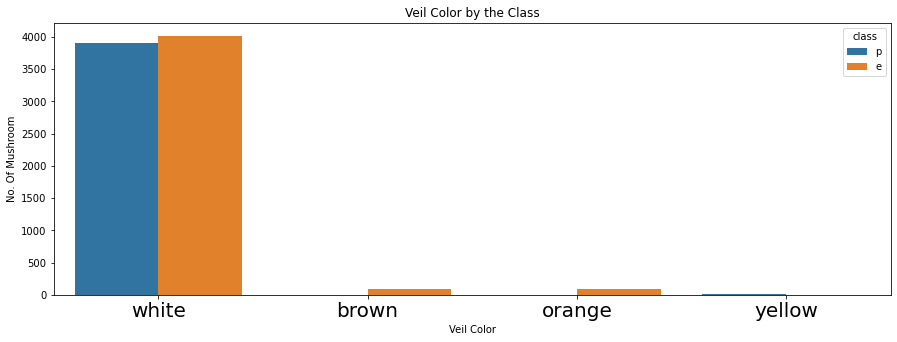

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'veil_color' , hue = 'class' , data = data )
plt.title('Veil Color by the Class')
plt.xlabel('Veil Color')
plt.ylabel('No. Of Mushroom');
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=10);

From the graph, we can see that the Veil Color can be used to know the class of the mushroom except when the color is white.

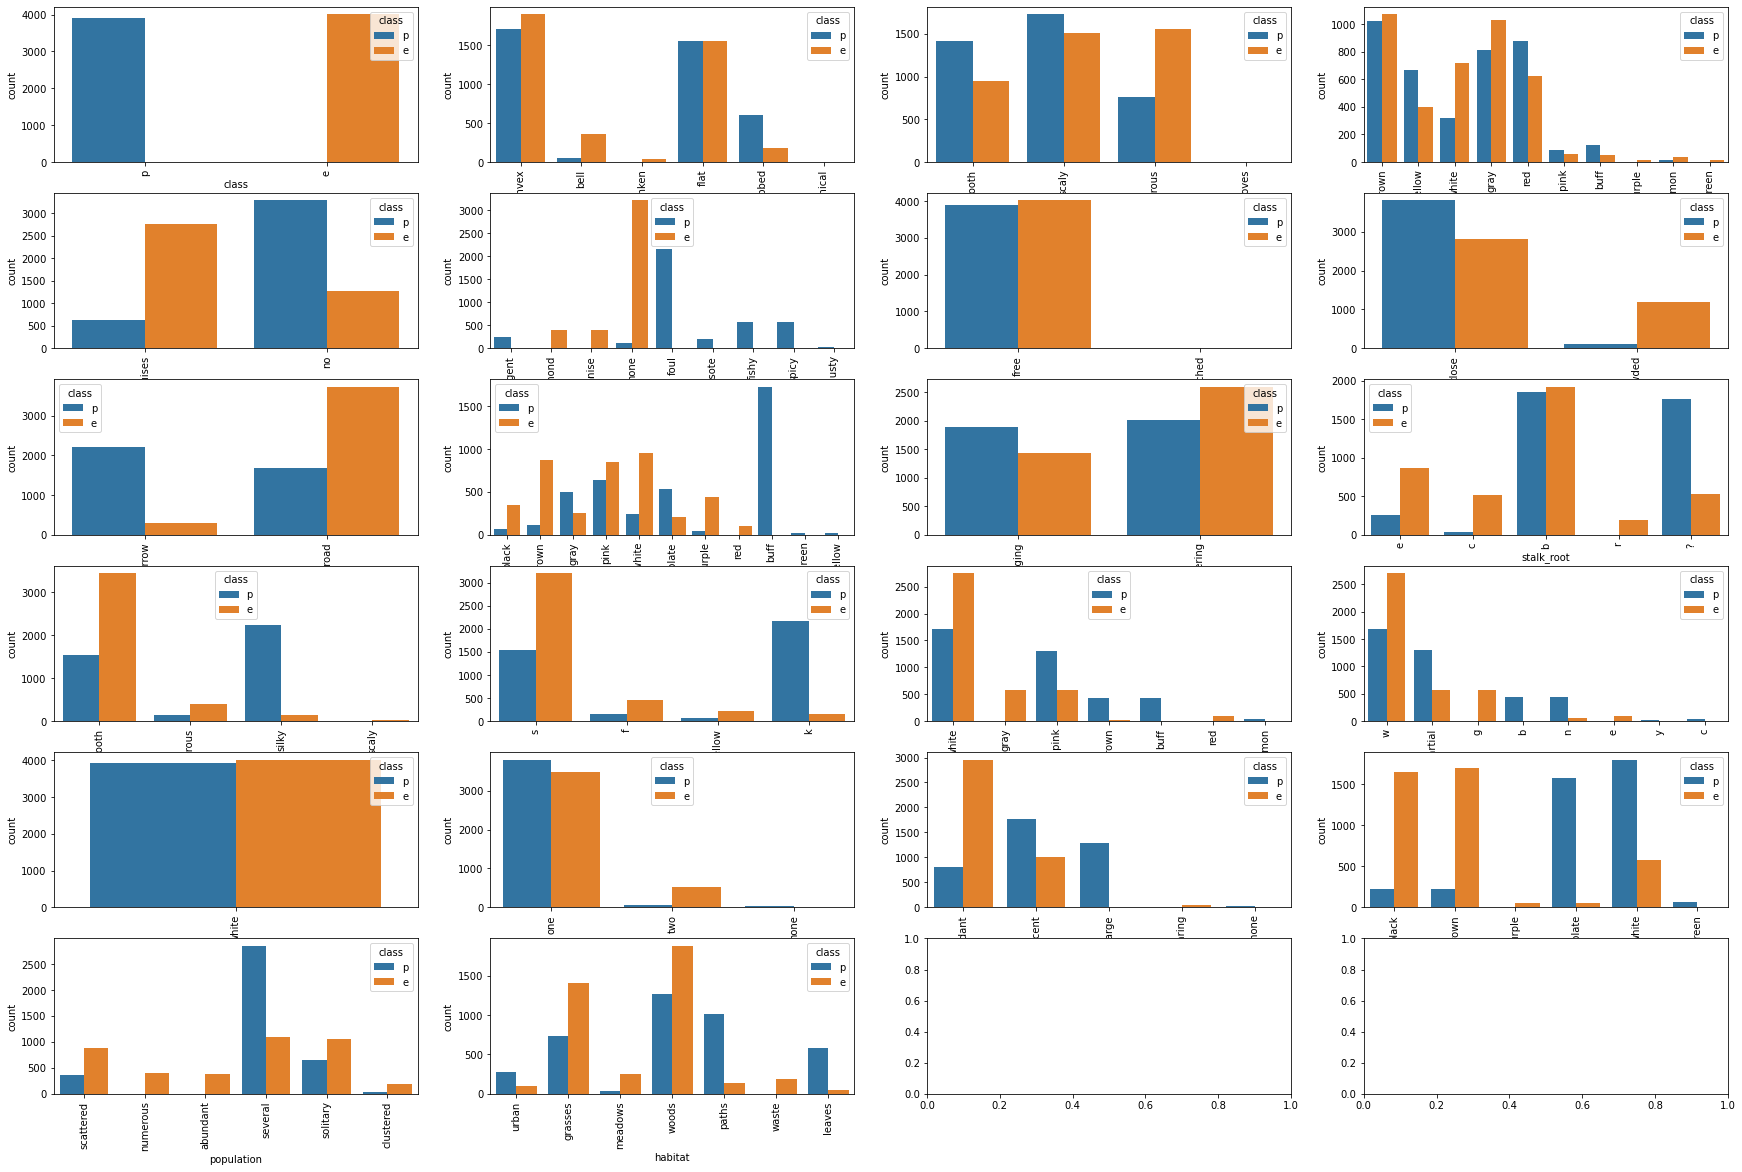

In [7]:
ndf = data.loc[data['veil_color'] == 'white'] 
fig, ax = plt.subplots(6, 4, figsize=(30, 20))
for variable, subplot in zip(ndf.columns.tolist(), ax.flatten()):
    sns.countplot(x = variable, hue = 'class' ,  data = ndf,  ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90); 

We did more analysis to know if there is a feature that can be used to know the class if the color is white. We noticed that the possible features are the smell & population & Stalk Color & Ring Type.

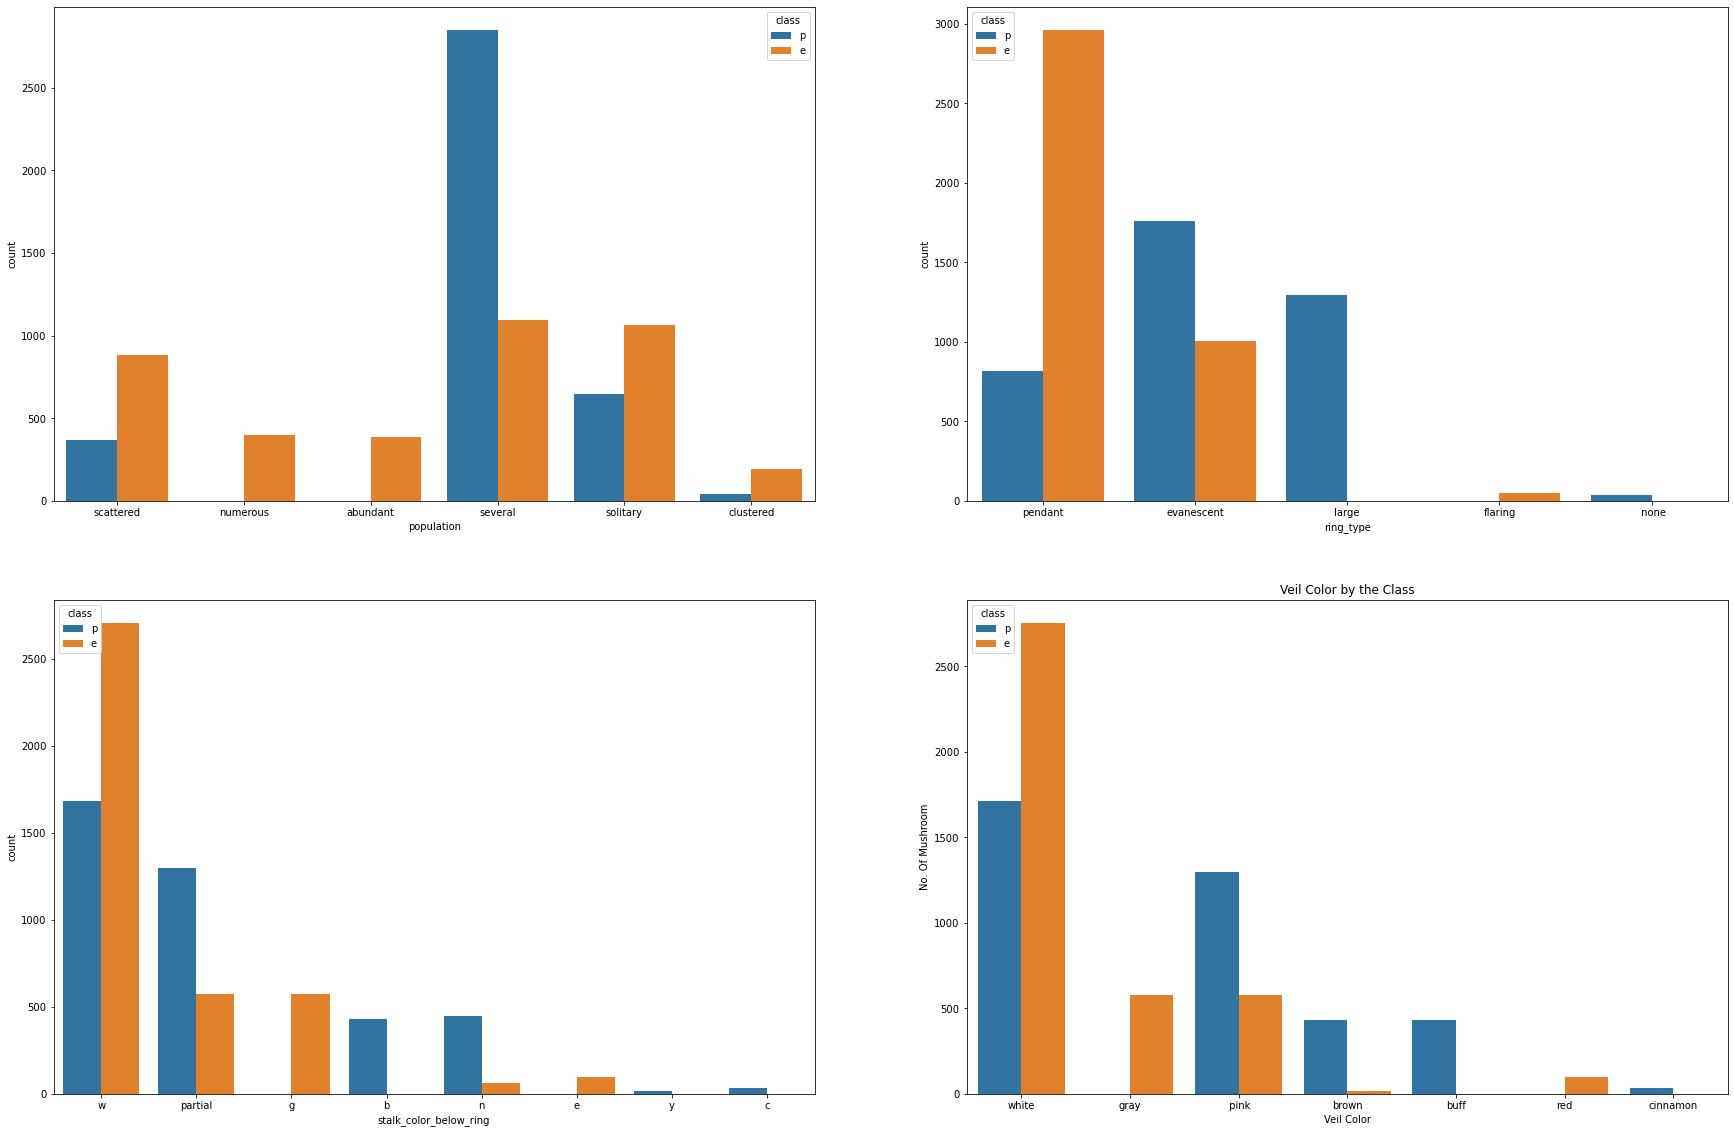

In [8]:
selected_rows = ['population','ring_type','stalk_color_below_ring','stalk_color_above_ring']
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
for variable, subplot in zip(selected_rows, ax.flatten()):
    sns.countplot(x = variable, hue = 'class' ,  data = ndf,  ax=subplot)
    plt.title('Veil Color by the Class')
    plt.xlabel('Veil Color')
    plt.ylabel('No. Of Mushroom');

here we can see the four fetures more clearly and notice that if the population abundant or numerous then it is (e). For the ring type if its is large the it is from type (p). Stalk color below the ring if it is buff and high chance for the brown and cinnamon. 

### <font color='green'>Dina-EDA</font>

In [22]:
labels = ['Edible', 'Poisonous']
values = [data.describe()['class']['freq'], data.describe()['class']['count']-data.describe()['class']['freq']]
colors = ['green', 'pink']

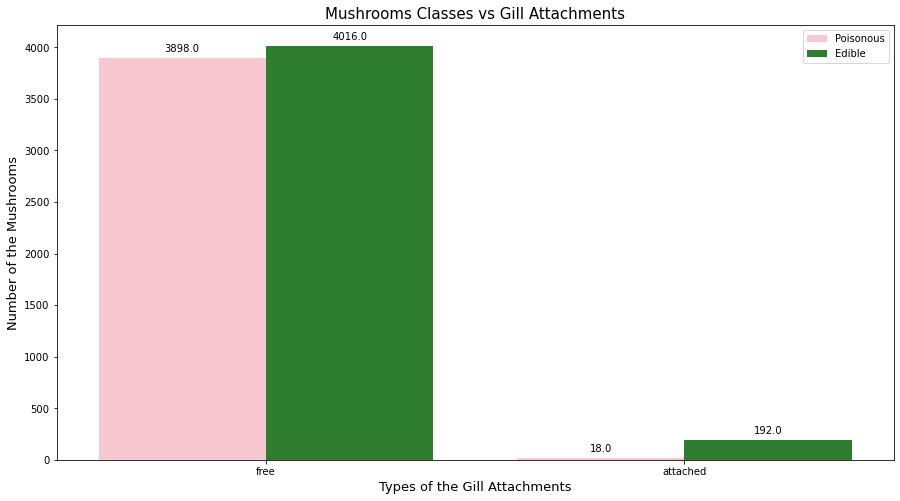

In [26]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill_attachment',
                      hue='class',
                      order=data['gill_attachment'].value_counts().index,
                      palette=['pink', 'forestgreen'])                      
splot.set_xticklabels(['free', 'attached'])

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('Types of the Gill Attachments', fontsize=13)
plt.title('Mushrooms Classes vs Gill Attachments', fontsize=15);

According to this graph, the Free type gill attachments are approximately equally distributed. In contrast, the Attached type gill attachments are most frequently edible.

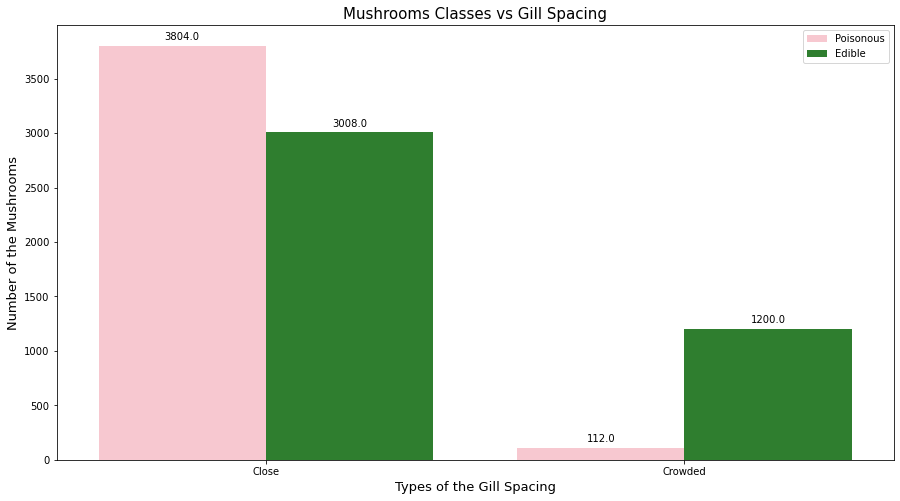

In [27]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill_spacing',
                      hue='class',
                      order=data['gill_spacing'].value_counts().index,
                      palette=['pink', 'forestgreen'])                   
splot.set_xticklabels(['Close', 'Crowded'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('Types of the Gill Spacing', fontsize=13)
plt.title('Mushrooms Classes vs Gill Spacing', fontsize=15);

According to this figure, when the Crowded type gill spacing is high it is frequently edible.however, we cannot say the same thing for the Close-type gill spacing mushrooms. Their class distribution by gill spacing is pretty close to each other.

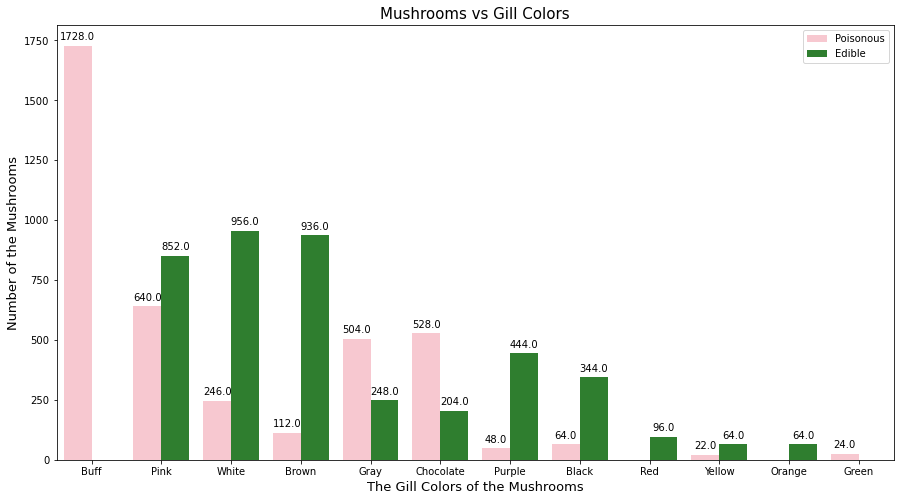

In [29]:
plt.figure(figsize=(15, 8))
splot = sns.countplot(data=data, x='gill_color',
                      hue='class',
                      order=data['gill_color'].value_counts().index,
                      palette=['pink', 'forestgreen'])
                      
splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red',
                       'Yellow', 'Orange', 'Green'])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   xytext=(0, 9),
                   textcoords='offset points')
plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=13)
plt.xlabel('The Gill Colors of the Mushrooms', fontsize=13)
plt.title('Mushrooms vs Gill Colors', fontsize=15);

As we can see from the figure above, the Buff-colored gills are highly poisonous. In contrast, the White, Brown, Purple, Black, and Red gill colors are high frequently edible.

### <font color='green'>Amal-EDA</font>

<BarContainer object of 6 artists>

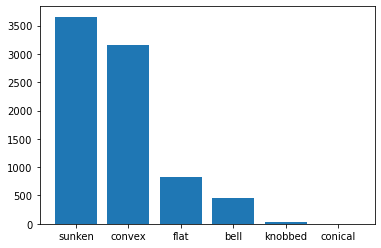

In [30]:
l=data['cap_shape'].value_counts()
dic={5:'sunken',2:'convex',3:'flat',0:'bell',4:'knobbed',1:'conical'}
plt.bar(list(dic.values()),l)


sunken shaped Mushrooms are more in quantity زconvex shape mushrooms are also in significant quantity and both types have atleast 1000 samples

<BarContainer object of 4 artists>

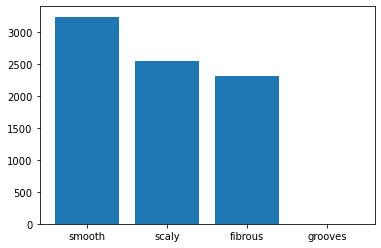

In [31]:
l1=data['cap_surface'].value_counts()
dic1 ={3:'smooth',2:'scaly',0:'fibrous',1:'grooves'}
plt.bar(list(dic1.values()),l1);


grooves Cap-surface mushrooms are very low in quantity in the sample, other categories of cap-surface are in considerable number

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

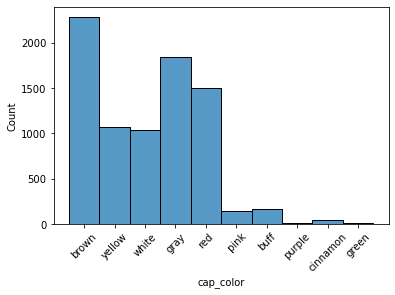

In [32]:
data['cap_color'].value_counts()
dic={0:'brown',1:'buff',2:'cinnamon',3:'gray',4:'green',5:'pink',6:'purple',7:'red',8:'white',9:'yellow'}
data['cap_color']=data['cap_color'].replace(dic)
ax=sns.histplot(data['cap_color'],bins=20)
plt.xticks(rotation=45)


green, gray and cinnamon Mushrooms are more in quantity than other colors of mushrooms and are above 1000 in quantity

In [33]:
# def plot_col(col, hue=None, color=['blue', 'purple'], labels=None):
#     fig, ax = plt.subplots(figsize=(15, 7))
#     sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
#     ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
#     if labels!=None:
#         ax.set_xticklabels(labels)
#     if hue!=None:
#         ax.legend(('Poisonous', 'Edible'), loc=0)

In [34]:
# color_dict = {"purple":"n","yellow":"y", "blue":"w", "violet":"g", "red":"e","pink":"p",
#               "orange":"b", "purple":"u", "black":"c", "green":"r"}
# plot_col(col='cap_color', color=color_dict.keys(), labels=color_dict)

### <font color='green'>Omar-EDA</font>

**Is there a relation between stalk properties and edibility ?**

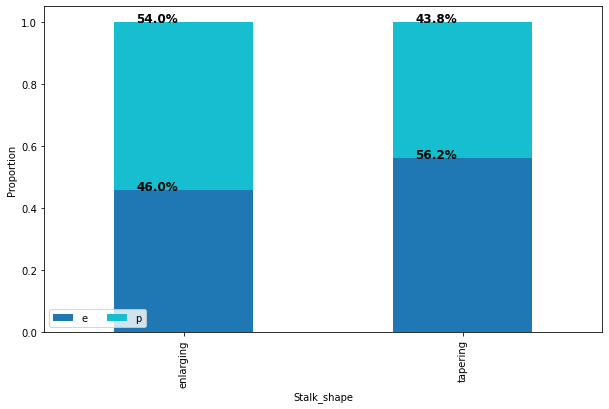

In [35]:
# Stalk_shape vs class

cross_tab_prop = pd.crosstab(index=data['stalk_shape'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_shape")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### We see that 54.0% of mushrooms with __enlarging__ stalk shape is poisonuos, and 43.8% of mushrooms with __tapering__ stalk shape is poisonuos.

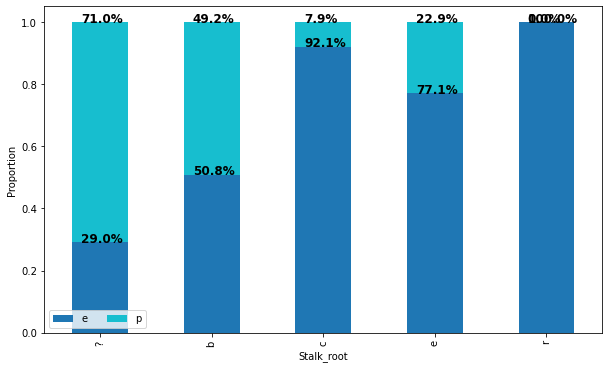

In [36]:
# Stalk_root vs class

cross_tab_prop = pd.crosstab(index=data['stalk_root'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Stalk_root")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks

### Insight: 
   ##### We see that if the mushroom has a __club__, __cup__, or __rooted__ stalk root, then there is a low chance for it to be poisonous. However, if the root is __bulbous__ then a chance of 49.2% is that the mushroom is poisonous. Moreover, in the dataset we have 2480 mushrooms with a __missing__ stalk root.


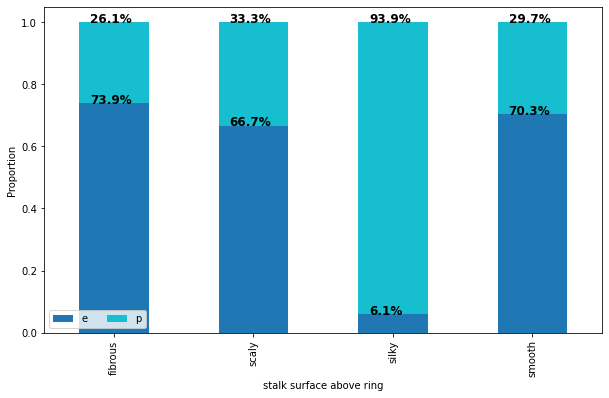

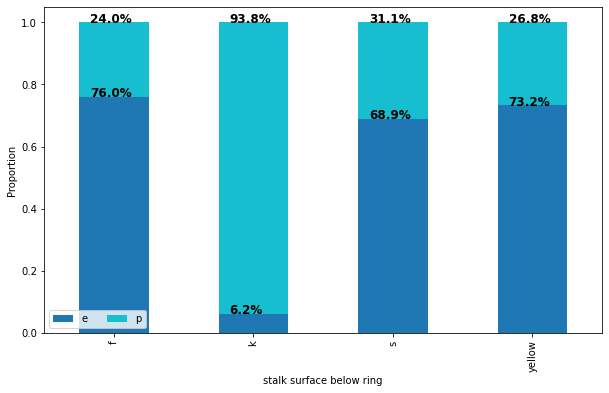

In [37]:
# Stalk_surface vs class

# stalk_surface_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_surface_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk surface below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks


### Insight: 
   ##### For the stalk surface, we see that the percentage are similar for above & below ring. __Fibrous__, __smooth__, and __scaly__ mushorooms have an average possibility of being poisonous as 25.1%, 30.4%, and 30.1%, respectively. However, __silky__ mushrooms have an average possibility of 93.9% for being poisonuous.
   #### The dataset contains:
      1- 2372 mushrooms with silky stalk surface above ring.
      2- 2304 mushrooms with silky stalk surface below ring.
      3- 1800 mushrooms with silky stalk surface above and below ring.


In [38]:
da2 = data[(data['stalk_surface_above_ring'] == 'k') & (data['stalk_surface_below_ring'] == 'k')]
da2.shape[0]

0

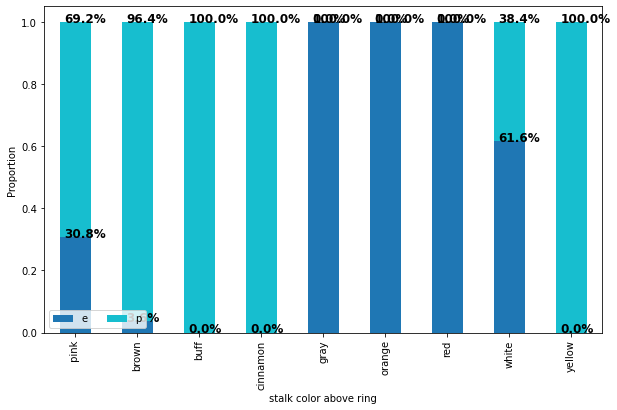

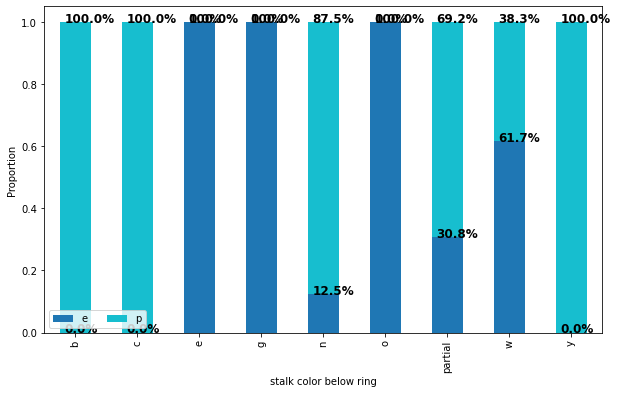

In [39]:
# Stalk_color vs class

# stalk_color_above_ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_above_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color above ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# stalk_surface_below ring

cross_tab_prop = pd.crosstab(index=data['stalk_color_below_ring'],
                             columns=data['class'],
                             normalize="index")

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("stalk color below ring")
plt.ylabel("Proportion")


for n, x in enumerate([*cross_tab_prop.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")


plt.show() # last bar + ticks


### Insight: 
   ##### For the stalk color, we see that the percentage are similar for above & below ring. Mushrooms with these stalk colors: __buff__, __cinnamon__, and __yellow__ either above or below ring, have 100% percentage of being poisonous. On the other hand, mushrooms with these stalk colors: __red__, __gray__, and __orange__ either above or below ring, have 0% percentage of being poisonous. Also, 38.3% of white colored stalk mushrooms are poisonous, and 69.2% of pink colored stalk mushrooms are poisonous, and brown colored stalk mushrooms have an average percentage of 92.0% for being poisonous.
   ##### Notes: in this dataset,
      1- There are only 8 yellow, 36 cinnamon for stalk color above the ring.
      2- There are only 24 yellow, 36 cinnamon for stalk color below the ring.
      3- Also, the 36 cinnamon stalk colored mushrooms have both cinnamon color above and below ring.
